<a href="https://colab.research.google.com/github/DCabrini/transfer_learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Neural Network Training with Transfer Learning**

The objective is to utilize an existing, pre-trained neural network that performs well on a larger dataset and use it as a foundation for a new model that leverages the accuracy of this previous network for a new task.
## **Treinamento de Redes Neurais com Transfer Learning**

O objetivo é utilizar uma rede neural existente e prévimaente treinada para um bom desempenho em um conjunto de dados maior e usá-la como base para um novo modelo que alavanca a precisão dessa rede anterior para uma nova tarefa.

In [1]:
# Importing Libraries


import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from PIL import Image, UnidentifiedImageError

[EN]:
Obtaining the Dataset

The first step will be loading our data. For our example, we will use the dataset  <a href="https://www.microsoft.com/en-us/download/details.aspx?id=54765" style="color:blue;">Kaggle Cats and Dogs Dataset</a>.

[PT]:


Obtendo conjunto de dados

O primeiro passo será carregar nossos dados. Para nosso exemplo, usaremos o conjunto de dados <a href="https://www.microsoft.com/en-us/download/details.aspx?id=54765" style="color:blue;">Kaggle Cats and Dogs Dataset</a>.

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2025-01-25 11:42:48--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.33.180.218, 2600:1408:c400:1680::317f, 2600:1408:c400:168a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.33.180.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  81.5MB/s    in 13s     

2025-01-25 11:43:01 (60.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
# Check diretories numbers
for dirs in os.walk('/tmp/PetImages/'):
  for dir in dirs:
    print(dir)

/tmp/PetImages/
['Dog', 'Cat']
[]
/tmp/PetImages/Dog
[]
['2640.jpg', '7187.jpg', '2242.jpg', '7378.jpg', '2426.jpg', '9359.jpg', '6916.jpg', '8524.jpg', '6397.jpg', '8795.jpg', '6038.jpg', '2827.jpg', '10734.jpg', '6015.jpg', '2737.jpg', '9478.jpg', '1033.jpg', '626.jpg', '4430.jpg', '3635.jpg', '5425.jpg', '2510.jpg', '11599.jpg', '3286.jpg', '2493.jpg', '8404.jpg', '9905.jpg', '9370.jpg', '10157.jpg', '5634.jpg', '6976.jpg', '9517.jpg', '6605.jpg', '6095.jpg', '5539.jpg', '4631.jpg', '8739.jpg', '11483.jpg', '10670.jpg', '1923.jpg', '11609.jpg', '8478.jpg', '3647.jpg', '6392.jpg', '2697.jpg', '11134.jpg', '11727.jpg', '7025.jpg', '8679.jpg', '7759.jpg', '7525.jpg', '8812.jpg', '2411.jpg', '1724.jpg', '6585.jpg', '3009.jpg', '8477.jpg', '2362.jpg', '7352.jpg', '4870.jpg', '4993.jpg', '12435.jpg', '4684.jpg', '1914.jpg', '5923.jpg', '1926.jpg', '11571.jpg', '2765.jpg', '11627.jpg', '5548.jpg', '1265.jpg', '3710.jpg', '7662.jpg', '4275.jpg', '7531.jpg', '11520.jpg', '1577.jpg', '2146.jp

In [4]:
# Checking the Number of Images

print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


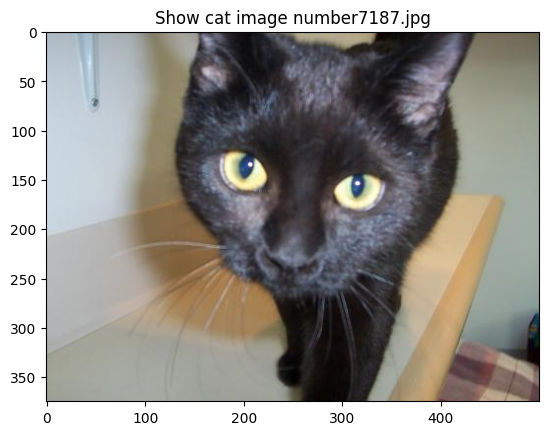

In [5]:
# Checking Cats Images and Image Size.

num = 1
img_file = os.path.join('/tmp/PetImages/Cat/', os.listdir('/tmp/PetImages/Cat/')[num])
num_image = os.listdir('/tmp/PetImages/Cat/')[num]
img = mping.imread(img_file)
plt.imshow(img)
plt.title(f'Show cat image number{num_image}')
plt.show()

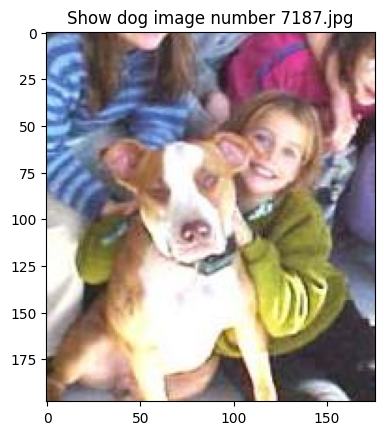

In [6]:
# Checking Dogs Images and Image Size.

num_dog = 1
imge_file_dog = os.path.join('/tmp/PetImages/Dog/', os.listdir('/tmp/PetImages/Dog/')[num_dog])
num_image_dog = os.listdir('/tmp/PetImages/Dog')[num_dog]
img_dog = mping.imread(imge_file_dog)
plt.imshow(img_dog)
plt.title(f'Show dog image number {num_image_dog}')
plt.show()

# Pré Processamneto

In [7]:
# Creating directories to save the resized images
os.makedirs('/tmp/cat_resized/', exist_ok=True)
resized_cat = '/tmp/cat_resized/'
os.makedirs('/tmp/dog_resized/', exist_ok=True)
resized_dog = '/tmp/dog_resized/'

# Original directories
original_cat = '/tmp/PetImages/Cat/'
original_dog = '/tmp/PetImages/Dog/'


In [8]:

def resized_images(resized, original):
  max_images = 1000
  count = 0
  for i in os.listdir(original):
    original_path = os.path.join(original, i)
    if os.path.isfile(original_path):
      try:
        image = Image.open(original_path)
        # Convert to RGB if necessary
        if image.mode != "RGB":
          image = image.convert("RGB")
        #Images Resized
        image_resized = image.resize((224,224))
        resized_path = os.path.join(resized, i)
        image_resized.save(resized_path)
        count += 1
      except UnidentifiedImageError:
        print(f"Erro: arquivo não identificado como imagem - {original_path}")
      except Exception as e:
        print(f"Erro ao processar {original_path}: {e}")
    if count >= max_images:
      break

resized_images(resized_cat, original_cat)
resized_images(resized_dog, original_dog)
# Check how many images were saved
print(f"Resized cat images: {len(os.listdir(resized_cat))}")
print(f"Resized dog images: {len(os.listdir(resized_dog))}")

Imagens de gato redimensionadas: 1000
Imagens de cachorro redimensionadas: 1000


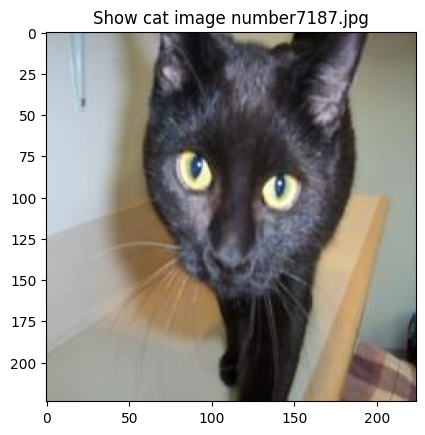

In [9]:
# Checking Cats Images and Image Size.

num = 1
img_file = os.path.join('/tmp/cat_resized/', os.listdir('/tmp/cat_resized/')[num])
num_image = os.listdir('/tmp/cat_resized/')[num]
img = mping.imread(img_file)
plt.imshow(img)
plt.title(f'Show cat image number{num_image}')
plt.show()

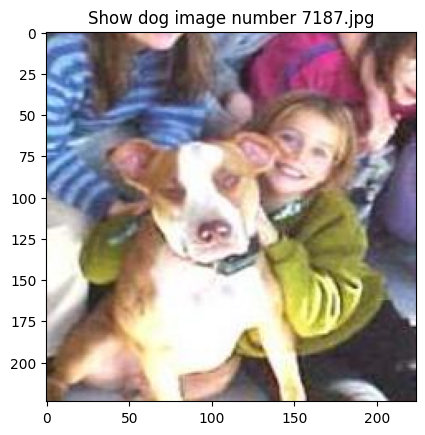

In [10]:
# Checking Dogs Images and Image Size.

num_dog = 1
imge_file_dog = os.path.join('/tmp/dog_resized/', os.listdir('/tmp/dog_resized/')[num_dog])
num_image_dog = os.listdir('/tmp/dog_resized/')[num_dog]
img_dog = mping.imread(imge_file_dog)
plt.imshow(img_dog)
plt.title(f'Show dog image number {num_image_dog}')
plt.show()

[EN] Limiting the dataset to 1000 images for better model performance.

[PT] Limitando em 1000 imagens o banco de dados para melhor desempenho do modelo.

In [11]:

# Converting to Numpy Array and Labeling the Respective Images
data_cat = []
data_dog = []

def array_images(resized):
  for i in os.listdir(resized):
    image = os.path.join(resized, i)
    img = Image.open(image)
    array_img = np.array(img)
    if resized == resized_cat:
      data_cat.append({"Array": array_img, "Class": 0})
    else:
      data_dog.append({"Array": array_img, "Class": 1})

array_images(resized_cat)
array_images(resized_dog)

In [12]:
print(f'Cat = {len(data_cat)}')
print(f'Dog = {len(data_dog)}')

Cat = 1000
Dog = 1000


**create training / validation / test split (70%, 15%, 15%)**

In [13]:
train_split = 0.7
validation_split = 0.15
test_split = 0.15

def split_data(list_split):
    idx_train = int((train_split) * (len(list_split)))
    idx_val = int((validation_split) * (len(list_split)))
    idx_test = int((test_split) * (len(list_split)))
    train = list_split[:idx_train]
    val = list_split[idx_train:idx_train + idx_val]
    test = list_split[idx_train + idx_val:idx_train + idx_val + idx_test]
    return train, val, test

train_cat, val_cat, test_cat = split_data(data_cat)
train_dog, val_dog, test_dog = split_data(data_dog)

print(len(train_cat))
print(len(val_cat))
print(len(test_cat))
print(len(train_dog))
print(len(val_dog))
print(len(test_dog))



700
150
150
700
150
150


In [14]:
training = train_cat + train_dog
validation = val_cat + val_dog
test = test_cat + test_dog

print(len(training))
print(len(validation))
print(len(test))

1400
300
300


[EN] Extracting Arrays and Labels from Dictionaries.

[PT] Extraindo Arrays e rótulos dos dicionários

In [15]:

x_train, Y_train = np.array([i["Array"] for i in training]), np.asanyarray([i["Class"] for i in training])
x_val, Y_val = np.array([i["Array"] for i in validation]), np.asanyarray([i["Class"] for i in validation])
x_test, Y_test = np.array([i["Array"] for i in test]), np.asanyarray([i["Class"] for i in test])

print("training data shape: ", x_train.shape)
print("training labels shape: ", Y_train.shape)
print("validation data shape: ", x_val.shape)
print("validation labels shape: ", Y_val.shape)
print("test data shape: ", x_test.shape)
print("test labels shape: ", Y_test.shape)


training data shape:  (1400, 224, 224, 3)
training labels shape:  (1400,)
validation data shape:  (300, 224, 224, 3)
validation labels shape:  (300,)
test data shape:  (300, 224, 224, 3)
test labels shape:  (300,)


**Scaling the Data - Reescalando dados**

In [16]:
x_train_scaling = x_train/255
x_val_scaling = x_val/255
x_test_scaling = x_test/255

[EN] **Transfer Learning Using ImageNet**

[PT] **Transfer Learning usando ImageNet**

In [17]:
# Importing Libraries
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Activation


In [18]:
# Loading the Pre-trained VGG16 Model

vgg = keras.applications.VGG16(weights= 'imagenet', include_top = True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Creating the New Output (Custom Final Class)
inp = vgg.input

In [20]:
# Creating the New Classification Layer
new_classification_layer = Dense(1, activation = 'sigmoid')

In [21]:
# Connecting the New Layer to the Output of VGG16's Penultimate Layer
out = new_classification_layer(vgg.layers[-2].output)

In [22]:
# Creating a New Model
model_new = Model(inp, out)

In [23]:
# Freezing the Weights of Previous Layers
for l, layer in enumerate(model_new.layers[:-1]):
  layer.trainable = False

In [24]:
# Making the Last Layer Trainable
for l, layer in enumerate(model_new.layers[-1:]):
  layer.trainable = True

In [25]:
# Compiling the Model

model_new.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
# New Model Summary
model_new.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [27]:
# Training the Model
history = model_new.fit(x_train_scaling, Y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val_scaling, Y_val))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 923s 85s/step - accuracy: 0.5035 - loss: 0.7855 - val_accuracy: 0.5233 - val_loss: 0.6641
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1017s 89s/step - accuracy: 0.6211 - loss: 0.6286 - val_accuracy: 0.5633 - val_loss: 0.6249
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 916s 85s/step - accuracy: 0.6787 - loss: 0.5636 - val_accuracy: 0.8300 - val_loss: 0.5067
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 920s 85s/step - accuracy: 0.8036 - loss: 0.4864 - val_accuracy: 0.8433 - val_loss: 0.4649
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 921s 84s/step - accuracy: 0.8370 - loss: 0.4558 - val_accuracy: 0.8567 - val_loss: 0.4441
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 923s 85s/step - accuracy: 0.8364 - loss: 0.4221 - val_accuracy: 0.8533 - val_loss: 0.4173
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 922s 85s/step - accuracy: 0.8382 - loss: 0.4118 - val_accuracy: 0.8633 - val_loss: 0.4019
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 962s 89s/step - accuracy: 0.8447 - loss: 0.3973 - val_accuracy: 0

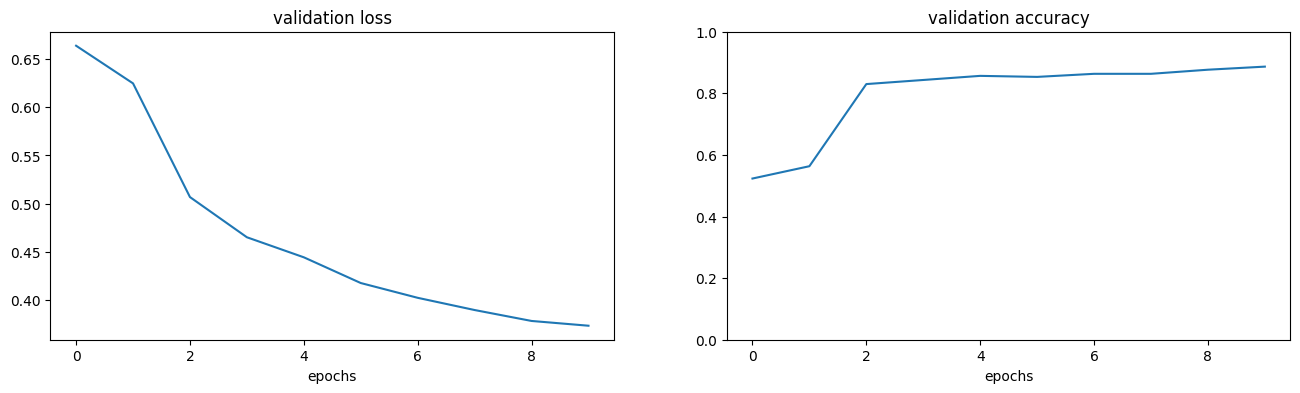

In [29]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [30]:
loss, accuracy = model_new.evaluate(x_test_scaling, Y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3771291971206665
Test accuracy: 0.8566666841506958
